In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=31e891e60203b394a02220b2da453398a07ec2a0935382a384cd17bce7c0b821
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


Yes, all images are of same size
images dimensions : (28, 28)


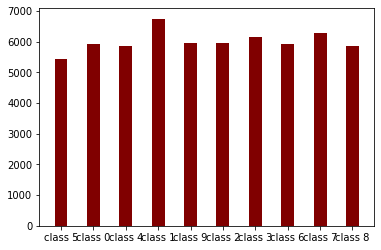

In [11]:
import idx2numpy
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

#Loading and reading data
f1 = '/content/drive/MyDrive/train-images-idx3-ubyte'
f2 = '/content/drive/MyDrive/t10k-images-idx3-ubyte'
f3 = '/content/drive/MyDrive/train-labels-idx1-ubyte'
f4 = '/content/drive/MyDrive/t10k-labels-idx1-ubyte'
trainImages = idx2numpy.convert_from_file(f1)
testImages = idx2numpy.convert_from_file(f2)
trainLabels = idx2numpy.convert_from_file(f3)
testLabels = idx2numpy.convert_from_file(f4)

#Generating 5 images of each class
randomImgEachClass = [[], [], [], [], [], [], [], [], [], []]
uniqueClassDict = {}
for i in range(len(trainLabels)):
	if(trainLabels[i] in uniqueClassDict.keys()):
		c = uniqueClassDict.get(trainLabels[i])
		if(c<5):
			randomImgEachClass[trainLabels[i]].append(trainImages[i])
			uniqueClassDict[trainLabels[i]] = c+1
	else:
		randomImgEachClass[trainLabels[i]].append(trainImages[i])
		uniqueClassDict[trainLabels[i]] = 1

for i in range(len(randomImgEachClass)):
	Hori = np.concatenate((randomImgEachClass[i][0], randomImgEachClass[i][1], randomImgEachClass[i][2], randomImgEachClass[i][3], randomImgEachClass[i][4]), axis=1)
	cv2_imshow(Hori)

cv2.waitKey(0)
cv2.destroyAllWindows()

#Exploratory Data Analysis

#Image size
imgSize = []
for i in range(len(trainImages)):
	imgStr = str(trainImages[i].shape)
	if(imgStr not in imgSize):
		imgSize.append(imgStr)

#Here the imgsize list length came out to be 1 which means all images are of same size
print("Yes, all images are of same size")
print("images dimensions :", trainImages[0].shape)

#Bar plot
countLabelsDict = {}
for i in range(len(trainLabels)):
    if(trainLabels[i] in countLabelsDict.keys()):
        getCount = countLabelsDict[trainLabels[i]]
        countLabelsDict[trainLabels[i]] = getCount+1
    else:
        countLabelsDict[trainLabels[i]] = 1

barXAxis = []
barYAxis = []

for k in countLabelsDict.keys():
    barXAxis.append("class " + str(k))
    barYAxis.append(countLabelsDict[k])

plt.bar(barXAxis, barYAxis, color ='maroon', width = 0.4)
plt.show() 

#Normalization
normalizedImages = []
for i in range(len(trainImages)):
	rows = trainImages.shape[0]
	cols = trainImages.shape[1]
	newImg = []
	for x in trainImages[i]:
		newL = []
		for y in x:
			newL.append(y/255.0)
		newImg.append(newL)
	normalizedImages.append(newImg)


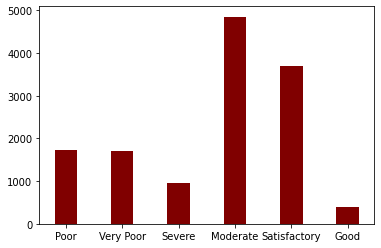

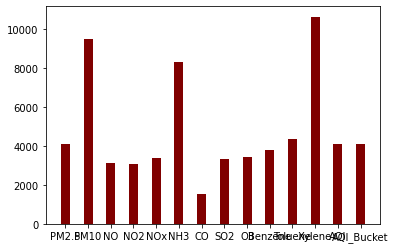

<ipython-input-21-fb0ac5bf4577>:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxValues = df.max()


                City        Date  PM2.5   PM10        NO        NO2  \
0          Ahmedabad  2015-01-01    NaN    NaN  0.002355   0.050302   
1          Ahmedabad  2015-01-02    NaN    NaN  0.002483   0.043317   
2          Ahmedabad  2015-01-03    NaN    NaN  0.044538   0.053284   
3          Ahmedabad  2015-01-04    NaN    NaN  0.004351   0.051020   
4          Ahmedabad  2015-01-05    NaN    NaN  0.056568   0.059137   
...              ...         ...    ...    ...       ...        ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.680000  25.060000   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.420000  26.060000   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.450000  29.530000   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.050000  29.260000   
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.400000  26.850000   

             NOx    NH3        CO        SO2         O3   Benzene    Toluene  \
0       0.036674    NaN  0.005233   0.142577   0.517441  0.000000  

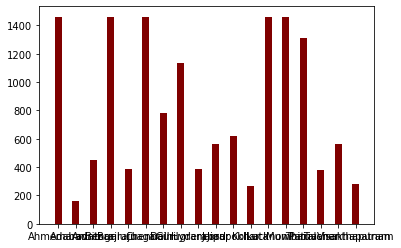

                City        Date  PM2.5   PM10        NO        NO2  \
0          Ahmedabad  2015-01-01   0.00   0.00  0.002355   0.050302   
1          Ahmedabad  2015-01-02   0.00   0.00  0.002483   0.043317   
2          Ahmedabad  2015-01-03   0.00   0.00  0.044538   0.053284   
3          Ahmedabad  2015-01-04   0.00   0.00  0.004351   0.051020   
4          Ahmedabad  2015-01-05   0.00   0.00  0.056568   0.059137   
...              ...         ...    ...    ...       ...        ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.680000  25.060000   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.420000  26.060000   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.450000  29.530000   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.050000  29.260000   
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.400000  26.850000   

             NOx    NH3        CO        SO2         O3   Benzene    Toluene  \
0       0.036674   0.00  0.005233   0.142577   0.517441  0.000000  

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/city_day.csv")

#class imbalance (histogram)
aqiConditions = {}
for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(pd.isna(df.loc[ind]['AQI_Bucket'])==False):
			if(df.loc[ind]['AQI_Bucket'] in aqiConditions):
				c = aqiConditions.get(df.loc[ind]['AQI_Bucket'])
				aqiConditions[df.loc[ind]['AQI_Bucket']] = c+1
			else:
				aqiConditions[df.loc[ind]['AQI_Bucket']] = 1

bins = []
binCount = []
for k in aqiConditions.keys():
	bins.append(k)
	binCount.append(aqiConditions[k])


plt.bar(bins, binCount, color ='maroon', width = 0.4)
plt.show()

#AQI normalization
maxAQI = -1
for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(pd.isna(df.loc[ind]['AQI'])==False):
			maxAQI = max(maxAQI, df.loc[ind]['AQI'])

for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(pd.isna(df.loc[ind]['AQI'])==False):
			aqiVal = df.loc[ind]['AQI']
			df.at[ind, 'AQI'] = aqiVal/maxAQI

x_hist = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
y_hist = []
for i in range(14):
	y_hist.append(0)
for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(pd.isna(df.loc[ind]['PM2.5'])):
			y_hist[0] = y_hist[0] + 1
		if(pd.isna(df.loc[ind]['PM10'])):
			y_hist[1] = y_hist[1] + 1
		if(pd.isna(df.loc[ind]['NO'])):
			y_hist[2] = y_hist[2] + 1
		if(pd.isna(df.loc[ind]['NO2'])):
			y_hist[3] = y_hist[3] + 1
		if(pd.isna(df.loc[ind]['NOx'])):
			y_hist[4] = y_hist[4] + 1
		if(pd.isna(df.loc[ind]['NH3'])):
			y_hist[5] = y_hist[5] + 1
		if(pd.isna(df.loc[ind]['CO'])):
			y_hist[6] = y_hist[6] + 1
		if(pd.isna(df.loc[ind]['SO2'])):
			y_hist[7] = y_hist[7] + 1
		if(pd.isna(df.loc[ind]['O3'])):
			y_hist[8] = y_hist[8] + 1
		if(pd.isna(df.loc[ind]['Benzene'])):
			y_hist[9] = y_hist[9] + 1
		if(pd.isna(df.loc[ind]['Toluene'])):
			y_hist[10] = y_hist[10] + 1
		if(pd.isna(df.loc[ind]['Xylene'])):
			y_hist[11] = y_hist[11] + 1
		if(pd.isna(df.loc[ind]['AQI'])):
			y_hist[12] = y_hist[12] + 1
		if(pd.isna(df.loc[ind]['AQI_Bucket'])):
			y_hist[13] = y_hist[13] + 1


plt.bar(x_hist, y_hist, color ='maroon', width = 0.4)
plt.show() 

maxValues = df.max()
for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(pd.isna(df.loc[ind]['PM2.5'])==False):
			pm25 = df.loc[ind]['PM2.5']
			df.at[ind, 'PM2.5'] = pm25/maxValues[2]
		if(pd.isna(df.loc[ind]['PM10'])==False):
			pm10 = df.loc[ind]['PM10']
			df.at[ind, 'PM10'] = pm10/maxValues[3]
		if(pd.isna(df.loc[ind]['NO'])==False):
			NO = df.loc[ind]['NO']
			df.at[ind, 'NO'] = NO/maxValues[4]
		if(pd.isna(df.loc[ind]['NO2'])==False):
			NO2 = df.loc[ind]['NO2']
			df.at[ind, 'NO2'] = NO2/maxValues[5]
		if(pd.isna(df.loc[ind]['NOx'])==False):
			NOx = df.loc[ind]['NOx']
			df.at[ind, 'NOx'] = NOx/maxValues[6]
		if(pd.isna(df.loc[ind]['NH3'])==False):
			NH3 = df.loc[ind]['NH3']
			df.at[ind, 'NH3'] = NH3/maxValues[7]
		if(pd.isna(df.loc[ind]['CO'])==False):
			CO = df.loc[ind]['CO']
			df.at[ind, 'CO'] = CO/maxValues[8]
		if(pd.isna(df.loc[ind]['SO2'])==False):
			SO2 = df.loc[ind]['SO2']
			df.at[ind, 'SO2'] = SO2/maxValues[9]
		if(pd.isna(df.loc[ind]['O3'])==False):
			O3 = df.loc[ind]['O3']
			df.at[ind, 'O3'] = O3/maxValues[10]
		if(pd.isna(df.loc[ind]['Benzene'])==False):
			Benzene = df.loc[ind]['Benzene']
			df.at[ind, 'Benzene'] = Benzene/maxValues[11]
		if(pd.isna(df.loc[ind]['Toluene'])==False):
			Toluene = df.loc[ind]['Toluene']
			df.at[ind, 'Toluene'] = Toluene/maxValues[12]
		if(pd.isna(df.loc[ind]['Xylene'])==False):
			Xylene = df.loc[ind]['Xylene']
			df.at[ind, 'Xylene'] = Xylene/maxValues[13]
		
print(df)

uniqueCities = []
for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(df.loc[ind]['City'] not in uniqueCities):
			uniqueCities.append(df.loc[ind]['City'])

uniqueCitiesDict = {}
for i in range(len(uniqueCities)):
	uniqueCitiesDict[uniqueCities[i]] = 0

for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(pd.isna(df.loc[ind]['PM2.5']) or pd.isna(df.loc[ind]['PM10']) or pd.isna(df.loc[ind]['NO']) or pd.isna(df.loc[ind]['NO2'])
		or pd.isna(df.loc[ind]['NOx']) or pd.isna(df.loc[ind]['NH3']) or pd.isna(df.loc[ind]['CO']) or pd.isna(df.loc[ind]['SO2'])
		or pd.isna(df.loc[ind]['O3']) or pd.isna(df.loc[ind]['Benzene']) or pd.isna(df.loc[ind]['Toluene']) or pd.isna(df.loc[ind]['Xylene'])
		or pd.isna(df.loc[ind]['AQI']) or pd.isna(df.loc[ind]['AQI_Bucket'])):
			uniqueCitiesDict[df.loc[ind]['City']] = uniqueCitiesDict[df.loc[ind]['City']] + 1

countNull = []
for i in range(len(uniqueCities)):
	countNull.append(uniqueCitiesDict[uniqueCities[i]])

plt.bar(uniqueCities, countNull, color ='maroon', width = 0.4)
plt.show() 

#imputation
df = df.fillna(0)
aqiBucketDict = {}
for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(df.loc[ind]['AQI_Bucket']!=0):
			if(df.loc[ind]['AQI_Bucket'] in aqiBucketDict.keys()):
				getCount = aqiBucketDict[df.loc[ind]['AQI_Bucket']]
				aqiBucketDict[df.loc[ind]['AQI_Bucket']] = getCount + 1
			else:
				aqiBucketDict[df.loc[ind]['AQI_Bucket']] = 1

maxCount = -1
maxCountAQI = ""
for k in aqiBucketDict.keys():
	if(aqiBucketDict[k]>maxCount):
		maxCount = aqiBucketDict[k]
		maxCountAQI = k

for ind in df.index:
	year = int(df.loc[ind]['Date'][:4])
	if(year>=2015 and year<2019):
		if(df.loc[ind]['AQI_Bucket']==0):
			df.at[ind, 'AQI_Bucket'] = maxCountAQI

print(df)

In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import datasets


def gradientDescent(theta, db_df, learningRate):
	updatedTheta = []
	gradient = []
	for i in range(len(theta)):
		updatedTheta.append(theta[i])
		gradient.append(0)

	m = 399
	n = db_df.shape[1]
	for i in range(m):
		y = db_df.iloc[i,n-1]
		intermediate = theta[0]
		for j in range(n-1):
			intermediate = intermediate + db_df.iloc[i, j]*theta[j+1]
		gradient[0] = gradient[0] - (2/m)*(y-intermediate)
		for j in range(n-1):
			gradient[j+1] = gradient[j+1] - (2/m)*db_df.iloc[i,j]*(y-intermediate)

	for i in range(len(theta)):
		updatedTheta[i] = theta[i] - gradient[i]*learningRate

	return updatedTheta
			

diabetes = datasets.load_diabetes()
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
db_df['Progression'] = diabetes.target


theta = []
for i in range(db_df.shape[1]):
	theta.append(0)


learningRate = 0.03
epochs = 5000

for i in range(epochs):
	updatedTheta = gradientDescent(theta, db_df, learningRate)
	for j in range(len(updatedTheta)):
		theta[j] = updatedTheta[j]

predicted = []
for i in range(399, db_df.shape[0]):
	yPred = theta[0]
	for j in range(len(theta)-1):
		yPred = yPred + theta[j+1]*db_df.iloc[i,j]

	predicted.append(yPred)

expected = []
for i in range(399, db_df.shape[0]):
	expected.append(db_df.iloc[i, db_df.shape[1]-1])

train_features = []
train_out = []
for i in range(399):
	train_f = []
	for j in range(db_df.shape[1]-1):
		train_f.append(db_df.iloc[i, j])
	train_features.append(train_f)

for i in range(399):
	train_out.append(db_df.iloc[i, db_df.shape[1]-1])

test_features = []
test_out = []
for i in range(399, db_df.shape[0]):
	test_f = []
	for j in range(db_df.shape[1]-1):
		test_f.append(db_df.iloc[i, j])
	test_features.append(test_f)

for i in range(399, db_df.shape[0]):
	test_out.append(db_df.iloc[i, db_df.shape[1]-1])


reg = linear_model.LinearRegression().fit(train_features, train_out)
predicted_values = reg.predict(test_features)


print("scratch predicted", predicted)
print("inbuilt", predicted_values)

scratch predicted [185.12895322900988, 157.64998861808436, 100.30286695231545, 171.4775691898705, 210.0884602265496, 168.8004876340456, 221.07007639961043, 62.46502714771048, 173.078992493428, 194.06851072956863, 180.76341297503825, 164.81743682342167, 130.8665871801135, 210.2383058884834, 126.76026906206332, 192.25962217781637, 171.4123058084549, 199.71503540596018, 143.63902064244573, 128.28963585233942, 96.2522448248852, 157.97677285710225, 195.5138308142104, 186.97098998123448, 169.91332489081364, 171.68484633075164, 92.20556172708794, 186.74993498212243, 133.74518444350196, 244.54791156009682, 113.82739591323187, 132.69284599631777, 130.29370269162212, 208.80644871799632, 88.60457560838434, 139.74838702311803, 125.66673313891519, 68.26432014051447, 183.16299981768492, 143.08038778831855, 140.59066963504685, 183.718443232128, 80.41596621618652]
inbuilt [188.07247897 185.55957945  90.37526191 152.17268368 250.669681
 198.29412469 280.59643037  51.0774851  176.96995559 201.88392495
 

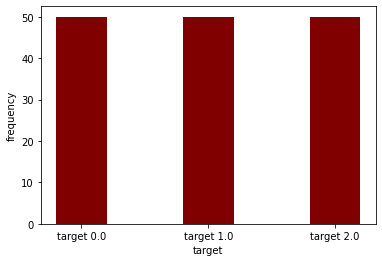

accuracy for code written from scratch (in precent): 100.0
accuracy for inbuilt (in percent) : 93.33333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def probCalc(x_train, x_test, mTrain, freqT1, freqT2, freqT3, feature):
	freqQ1T1 = 0
	freqQ1T2 = 0
	freqQ1T3 = 0
	freqQ2T1 = 0
	freqQ2T2 = 0
	freqQ2T3 = 0
	freqQ3T1 = 0
	freqQ3T2 = 0
	freqQ3T3 = 0
	freqQ4T1 = 0
	freqQ4T2 = 0
	freqQ4T3 = 0
	for i in range(mTrain):
		if(y_train.iloc[i, 0]==0.0):
			if(x_train.iloc[i, feature]>=0 and x_train.iloc[i, feature]<0.25):
				freqQ1T1 = freqQ1T1 + 1
			elif(x_train.iloc[i, feature]>=0.25 and x_train.iloc[i, feature]<0.5):
				freqQ2T1 = freqQ2T1 + 1
			elif(x_train.iloc[i, feature]>=0.5 and x_train.iloc[i, feature]<0.75):
				freqQ3T1 = freqQ3T1 + 1
			else:
				freqQ4T1 = freqQ4T1 + 1
		elif(y_train.iloc[i, 0]==1.0):
			if(x_train.iloc[i, feature]>=0 and x_train.iloc[i, feature]<0.25):
				freqQ1T2 = freqQ1T2 + 1
			elif(x_train.iloc[i, feature]>=0.25 and x_train.iloc[i, feature]<0.5):
				freqQ2T2 = freqQ2T2 + 1
			elif(x_train.iloc[i, feature]>=0.5 and x_train.iloc[i, feature]<0.75):
				freqQ3T2 = freqQ3T2 + 1
			else:
				freqQ4T2 = freqQ4T2 + 1
		else:
			if(x_train.iloc[i, feature]>=0 and x_train.iloc[i, feature]<0.25):
				freqQ1T3 = freqQ1T3 + 1
			elif(x_train.iloc[i, feature]>=0.25 and x_train.iloc[i, feature]<0.5):
				freqQ2T3 = freqQ2T3 + 1
			elif(x_train.iloc[i, feature]>=0.5 and x_train.iloc[i, feature]<0.75):
				freqQ3T3 = freqQ3T3 + 1
			else:
				freqQ4T3 = freqQ4T3 + 1

	freqQ1T1 = freqQ1T1/freqT1
	freqQ2T1 = freqQ2T1/freqT1
	freqQ3T1 = freqQ3T1/freqT1
	freqQ4T1 = freqQ4T1/freqT1

	freqQ1T2 = freqQ1T2/freqT2
	freqQ2T2 = freqQ2T2/freqT2
	freqQ3T2 = freqQ3T2/freqT2
	freqQ4T2 = freqQ4T2/freqT2

	freqQ1T3 = freqQ1T3/freqT3
	freqQ2T3 = freqQ2T3/freqT3
	freqQ3T3 = freqQ3T3/freqT3
	freqQ4T3 = freqQ4T3/freqT3

	return [[freqQ1T1, freqQ2T1, freqQ3T1, freqQ4T1], 
			[freqQ1T2, freqQ2T2, freqQ3T2, freqQ4T2],
			[freqQ1T3, freqQ2T3, freqQ3T3, freqQ4T3]]

iris = load_iris()
X = pd.DataFrame(iris.data[:])
Y = pd.DataFrame(iris.target)

m = X.shape[0]
n = X.shape[1]


#EDA
#bar plot
freqT1 = 0
freqT2 = 0
freqT3 = 0
for i in range(m):
	if(Y.iloc[i,0]==0.0):
		freqT1 = freqT1 + 1
	elif(Y.iloc[i,0]==1.0):
		freqT2 = freqT2 + 1
	else:
		freqT3 = freqT3 + 1

plt.bar(['target 0.0', 'target 1.0', 'target 2.0'], [freqT1, freqT2, freqT3], color ='maroon', width = 0.4)
plt.xlabel("target")
plt.ylabel("frequency")
plt.show()

#normalization
maxList = []
for j in range(n):
	maxVal = -1
	for i in range(m):
		maxVal = max(maxVal, X.iloc[i, j])
	maxList.append(maxVal)

for j in range(n):
	for i in range(m):
		X.iloc[i, j] = X.iloc[i, j]/maxList[j]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .9)

mTrain = x_train.shape[0]
nTrain = x_train.shape[1]

mTest = x_test.shape[0]
nTest = x_test.shape[1]

freqT1 = 0
freqT2 = 0
freqT3 = 0

#[0,0.25), [0.25,0.5), [0.5,0.75), [0.75,1]
for i in range(mTrain):
	if(y_train.iloc[i,0]==0.0):
		freqT1 = freqT1 + 1
	elif(y_train.iloc[i,0]==1.0):
		freqT2 = freqT2 + 1
	else:
		freqT3 = freqT3 + 1

prob_T1 = freqT1/mTrain
prob_T2 = freqT2/mTrain
prob_T3 = freqT3/mTrain

likelihood = []

for i in range(nTrain):
	likelihood.append(probCalc(x_train, x_test, mTrain, freqT1, freqT2, freqT3, i))

actualOut = []
for i in range(mTest):
	actualOut.append(y_test.iloc[i][0])

classified = []
for i in range(mTest):
	probT0 = prob_T1
	probT1 = prob_T2
	probT2 = prob_T3
	for j in range(nTest):
		if(x_test.iloc[i, j]>=0 and x_test.iloc[i, j]<0.25):
			probT0 = probT0*likelihood[j][0][0]
			probT1 = probT1*likelihood[j][1][0]
			probT2 = probT2*likelihood[j][2][0]
		elif(x_test.iloc[i, j]>=0.25 and x_test.iloc[i, j]<0.5):
			probT0 = probT0*likelihood[j][0][1]
			probT1 = probT1*likelihood[j][1][1]
			probT2 = probT2*likelihood[j][2][1]
		elif(x_test.iloc[i, j]>=0.5 and x_test.iloc[i, j]<0.75):
			probT0 = probT0*likelihood[j][0][2]
			probT1 = probT1*likelihood[j][1][2]
			probT2 = probT2*likelihood[j][2][2]
		else:
			probT0 = probT0*likelihood[j][0][3]
			probT1 = probT1*likelihood[j][1][3]
			probT2 = probT2*likelihood[j][2][3]

	if(probT0>=probT1 and probT0>=probT2):
		classified.append(0.0)
	elif(probT1>=probT0 and probT1>=probT2):
		classified.append(1.0)
	else:
		classified.append(2.0)


cnb = GaussianNB()
y_pred = cnb.fit(x_train, y_train).predict(x_test)

scratch_accuracy = 0
inbuilt_accuracy = 0

for i in range(len(y_pred)):
	if(classified[i]==y_test.iloc[i,0]):
		scratch_accuracy = scratch_accuracy + 1
	if(y_pred[i]==y_test.iloc[i, 0]):
		inbuilt_accuracy = inbuilt_accuracy + 1

print("accuracy for code written from scratch (in precent):", (scratch_accuracy/len(y_pred))*100)
print("accuracy for inbuilt (in percent) :", (inbuilt_accuracy/len(y_pred))*100)

Optimum K : 150


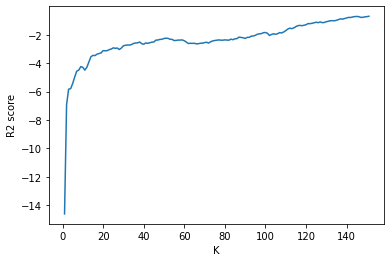

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


def euclideanDist(trainAgeList, testAge):
	euclideanList = []
	for i in range(len(trainAgeList)):
		euclideanList.append([i, abs(testAge-trainAgeList[i])])
	return euclideanList

def knearestMean(euclideanList, k, trainBMDList):
	sortedEuclideanList = sorted(euclideanList, key=lambda x: (x[1]))
	summ = 0
	for i in range(k):
		summ = summ + trainBMDList[sortedEuclideanList[i][0]]
	return summ/k

df = pd.read_csv("/content/drive/MyDrive/bmd.csv")

trainAgeList = []
trainBMDList = []
testAgeList = []
testBMDList = []

LastTestIdx = int((df.shape[0]*90)/100)


for i in range(df.shape[0]):
	if(i<=LastTestIdx):
		trainAgeList.append(df.iloc[i]['age'])
		trainBMDList.append(df.iloc[i]['bmd'])
	else:
		testAgeList.append(df.iloc[i]['age'])
		testBMDList.append(df.iloc[i]['bmd'])

ListOfEuclideans = []
for i in range(len(testAgeList)):
	ListOfEuclideans.append(euclideanDist(trainAgeList, testAgeList[i]))

predictionListForEachK = []


for k in range(1, LastTestIdx):
	predictions = []
	for i in range(len(testAgeList)):
		predictions.append(knearestMean(ListOfEuclideans[i], k, trainBMDList))
	predictionListForEachK.append(predictions)

sumBMD = 0
for i in range(len(testAgeList)):
	sumBMD = sumBMD + testBMDList[i]
meanBMDTest = sumBMD/len(testAgeList)

r2ScoreList = []
for i in range(len(predictionListForEachK)):
	numerator = 0
	denominator = 0
	for j in range(len(testAgeList)):
		numerator = numerator + (testBMDList[j]-predictionListForEachK[i][j])**2
		denominator = denominator + (testBMDList[j]-meanBMDTest)**2
	r2Score = 1 - (numerator/denominator)
	r2ScoreList.append(r2Score)

maxR2Score = -10000
maxR2ScoreIdx = -1
for i in range(len(r2ScoreList)):
	if(maxR2Score<r2ScoreList[i]):
		maxR2Score = r2ScoreList[i]
		maxR2ScoreIdx = i

print("Optimum K :", maxR2ScoreIdx)
x_axis = []
for i in range(1, len(predictionListForEachK)+1):
	x_axis.append(i)

plt.plot(x_axis, r2ScoreList)
plt.xlabel("K")
plt.ylabel("R2 score")
plt.show()